In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver
from superfv.initial_conditions import toro2
from teyssier import riemann

In [2]:
gamma = 1.4
N = 100
T = 0.15

configs = {
    "MUSCL-Hancock": dict(
        riemann_solver="hllct",
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        flux_recipe=2,
        SED=True,
    ),
    "ZS3-SSPRK2": dict(
        riemann_solver="hllct",
        p=3,
        ZS=True,
        flux_recipe=2,
        lazy_primitives=True,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "ZS3-SSPRK3": dict(
        riemann_solver="hllct",
        p=3,
        ZS=True,
        flux_recipe=2,
        lazy_primitives=True,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

In [3]:
# compute exact solution
Nana = 2048
xana = (np.arange(Nana) + 0.5) / Nana
wana = np.zeros([3, Nana])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.15
    d, v, p = riemann.exact_solution(s, [1, -2, 0.4], [1, 2, 0.4])
    wana[:, i] = [d, v, p]


def compute_entropy(rho, P):
    return P / rho**gamma

In [4]:
sims = {}
for name, config in configs.items():
    sim = EulerSolver(ic=toro2, gamma=gamma, nx=N, bcx="free", **config)
    try:
        q_max = 1 if "SSPRK2" in name else 2
        sim.run(T, q_max=q_max, muscl_hancock=config.get("MUSCL", False))
    except Exception as e:
        print(f"Error occurred while running {name}: {e}")
    sims[name] = sim

Step #52 @ t=1.50e-01 | dt=1.55e-03 | min(rho)=2.68e-02, min(P)=5.84e-03 | (done)                   
Step #52 @ t=1.50e-01 | dt=1.55e-03 | min(rho)=1.60e-02, min(P)=3.54e-03 | (done)                   
Step #52 @ t=1.50e-01 | dt=1.55e-03 | min(rho)=2.71e-02, min(P)=3.57e-03 | (done)                   


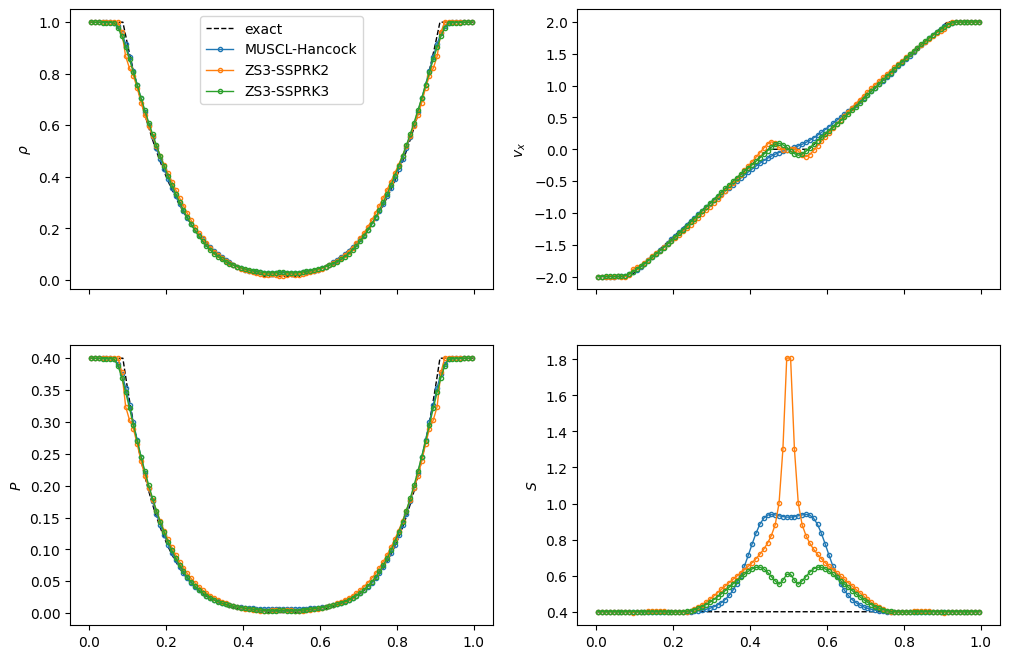

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axs[0, 0].set_ylabel(r"$\rho$")
axs[0, 1].set_ylabel(r"$v_x$")
axs[1, 0].set_ylabel(r"$P$")
axs[1, 1].set_ylabel(r"$S$")

style0 = dict(color="k", linestyle="--", label="exact", linewidth=1)
style1 = dict(marker="o", markersize=3, mfc="none", linewidth=1)

axs[0, 0].plot(xana, wana[0, :], **style0)
axs[0, 1].plot(xana, wana[1, :], **style0)
axs[1, 0].plot(xana, wana[2, :], **style0)
axs[1, 1].plot(xana, compute_entropy(wana[0, :], wana[2, :]), **style0)

for name, sim in sims.items():
    idx = sim.variable_index_map
    x = sim.mesh.x_centers
    w = sim.snapshots[-1]["wcc"][:, :, 0, 0]
    s = compute_entropy(w[idx("rho")], w[idx("P")])

    axs[0, 0].plot(x, w[idx("rho")], label=name, **style1)
    axs[0, 1].plot(x, w[idx("vx")], label=name, **style1)
    axs[1, 0].plot(x, w[idx("P")], label=name, **style1)
    axs[1, 1].plot(x, s, label=name, **style1)

axs[0, 0].legend()

In [6]:
configs = {
    "MUSCL-Hancock": dict(
        riemann_solver="hllct",
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        flux_recipe=2,
        SED=True,
    ),
    "MM3-SSPRK2": dict(
        riemann_solver="hllct",
        p=3,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        flux_recipe=2,
        NAD=True,
        NAD_rtol=1e-1,
        NAD_atol=1e-8,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "MM3-SSPRK3": dict(
        riemann_solver="hllct",
        p=3,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        flux_recipe=2,
        NAD=True,
        NAD_rtol=1e-1,
        NAD_atol=1e-8,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

In [7]:
sims = {}
for name, config in configs.items():
    sim = EulerSolver(ic=toro2, nx=N, bcx="free", **config)
    try:
        q_max = 1 if "SSPRK2" in name else 2
        sim.run(T, q_max=q_max, muscl_hancock=config.get("MUSCL", False))
    except Exception as e:
        print(f"Error occurred while running {name}: {e}")
    sims[name] = sim

Step #52 @ t=1.50e-01 | dt=1.55e-03 | min(rho)=2.68e-02, min(P)=5.84e-03 | (done)                   
Step #52 @ t=1.50e-01 | dt=1.66e-03 | min(rho)=2.02e-02, min(P)=6.09e-03 | (done)                   
Step #52 @ t=1.50e-01 | dt=1.58e-03 | min(rho)=2.62e-02, min(P)=5.32e-03 | (done)                   


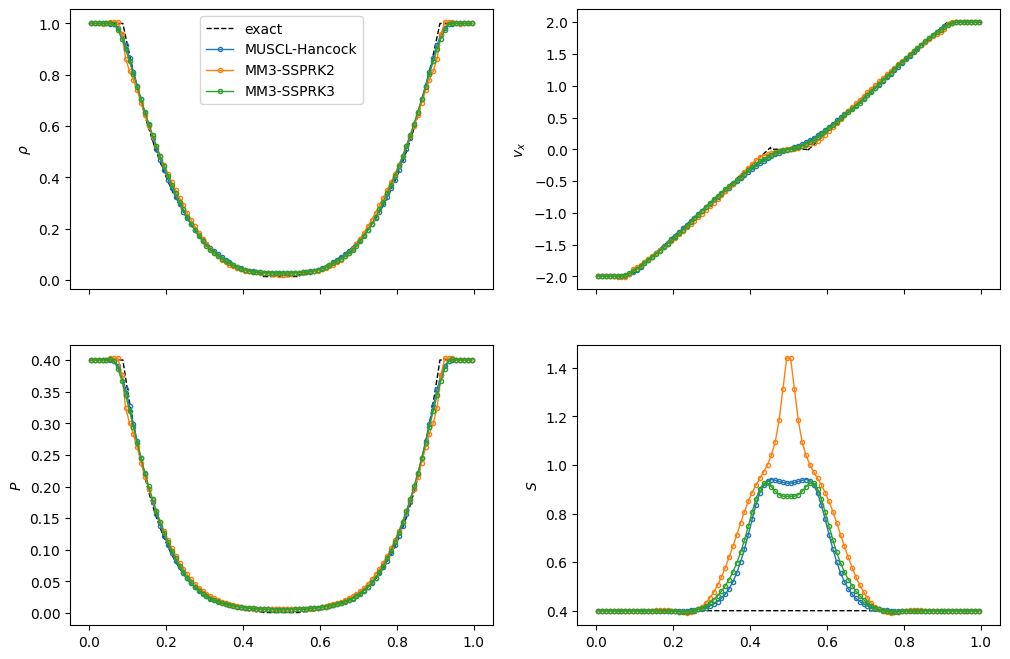

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axs[0, 0].set_ylabel(r"$\rho$")
axs[0, 1].set_ylabel(r"$v_x$")
axs[1, 0].set_ylabel(r"$P$")
axs[1, 1].set_ylabel(r"$S$")

style0 = dict(color="k", linestyle="--", label="exact", linewidth=1)
style1 = dict(marker="o", markersize=3, mfc="none", linewidth=1)

axs[0, 0].plot(xana, wana[0, :], **style0)
axs[0, 1].plot(xana, wana[1, :], **style0)
axs[1, 0].plot(xana, wana[2, :], **style0)
axs[1, 1].plot(xana, compute_entropy(wana[0, :], wana[2, :]), **style0)

for name, sim in sims.items():
    idx = sim.variable_index_map
    x = sim.mesh.x_centers
    w = sim.snapshots[-1]["wcc"][:, :, 0, 0]
    s = compute_entropy(w[idx("rho")], w[idx("P")])

    axs[0, 0].plot(x, w[idx("rho")], label=name, **style1)
    axs[0, 1].plot(x, w[idx("vx")], label=name, **style1)
    axs[1, 0].plot(x, w[idx("P")], label=name, **style1)
    axs[1, 1].plot(x, s, label=name, **style1)

axs[0, 0].legend()